In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from DeepPurpose import utils, models, dataset
from DeepPurpose.utils import *

In [3]:
import numpy as np
import pandas as pd
import json
import os 
print(os.path.abspath('.'))

/root/data/DeepPurpose


In [4]:
Smile = np.load("DTC_smiles_reg.npy", allow_pickle=True)
Target = np.load("DTC_targets_reg.npy", allow_pickle=True)
y = np.load("DTC_y_reg.npy", allow_pickle=True)
print('Done!')

Done!


In [5]:
X_drugs, X_targets, y = Smile, Target, y
print('Drug 1: ' + X_drugs[0])
print('Target 1: ' + X_targets[0])
print('Score 1: ' + str(y[0]))

Drug 1: CCCN1C(C)=CC=C2C(=O)NC(N)N=C21
Target 1: MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKGRINLVLSRELKEPPQGAHFLSRSLDDALKLTEQPELANKVDMVWIVGGSSVYKEAMNHPGHLKLFVTRIMQDFESDTFFPEIDLEKYKLLPEYPGVLSDVQEEKGIKYKFEVYEKND
Score 1: 9.221848749616356


In [6]:
y.shape

(61479,)

In [7]:
drug_encoding, target_encoding = 'MPNN', 'CNN'

In [8]:
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.8,0.1,0.1],
                                random_seed = 1)
train.head(1)

in total: 61479 drug-target pairs
encoding drug...
unique drugs: 7626
drug encoding finished...
encoding protein...
unique target sequence: 895
protein encoding finished...
splitting dataset...
Done.


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,CCCN1C(C)=CC=C2C(=O)NC(N)N=C21,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...,9.221849,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[M, V, G, S, L, N, C, I, V, A, V, S, Q, N, M, ..."


In [9]:
# use pre-trained model
model = models.model_pretrained(path_dir = './pre-trained/MPNN_CNN_DTC_RANDOM/')
model.config

{'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'hidden_dim_drug': 256,
 'hidden_dim_protein': 256,
 'cls_hidden_dims': [1024, 1024, 512],
 'batch_size': 1024,
 'train_epoch': 150,
 'test_every_X_epoch': 20,
 'LR': 0.001,
 'drug_encoding': 'MPNN',
 'target_encoding': 'CNN',
 'result_folder': './result/',
 'binary': False,
 'num_workers': 10,
 'mpnn_hidden_size': 50,
 'mpnn_depth': 3,
 'cnn_target_filters': [32, 64, 96],
 'cnn_target_kernels': [4, 8, 12],
 'decay': 0}

In [10]:
'''
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         #cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 50, 
                         #test_every_X_epoch = 10, 
                         LR = 0.001, 
                         #decay = 0.001,
                         batch_size = 1024,
                         #hidden_dim_drug = 128,
                         #mpnn_hidden_size = 128,
                         #mpnn_depth = 3, 
                         #cnn_drug_filters = [32,64,96],
                         #cnn_drug_kernels = [4,6,8], 
                         #cnn_target_filters = [32,64,96],
                         #cnn_target_kernels = [4,8,12],
                         #transformer_n_layer_target = 2,
                         num_workers = 10
                              )
'''

'\nconfig = utils.generate_config(drug_encoding = drug_encoding, \n                         target_encoding = target_encoding, \n                         #cls_hidden_dims = [1024,1024,512], \n                         train_epoch = 50, \n                         #test_every_X_epoch = 10, \n                         LR = 0.001, \n                         #decay = 0.001,\n                         batch_size = 1024,\n                         #hidden_dim_drug = 128,\n                         #mpnn_hidden_size = 128,\n                         #mpnn_depth = 3, \n                         #cnn_drug_filters = [32,64,96],\n                         #cnn_drug_kernels = [4,6,8], \n                         #cnn_target_filters = [32,64,96],\n                         #cnn_target_kernels = [4,8,12],\n                         #transformer_n_layer_target = 2,\n                         num_workers = 10\n                              )\n'

In [11]:
#model = models.model_initialize(**config)

In [12]:
model.config['train_epoch'] = 50
#model.config['batch_size'] = 1024

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.16887. Total time 0.00166 hours
Validation at Epoch 1 , MSE: 0.31884 , Pearson Correlation: 0.88970 with p-value: 0.0 , Concordance Index: 0.89476
Training at Epoch 2 iteration 0 with loss 0.18897. Total time 0.04305 hours
Validation at Epoch 2 , MSE: 0.29970 , Pearson Correlation: 0.89555 with p-value: 0.0 , Concordance Index: 0.89709
Training at Epoch 3 iteration 0 with loss 0.18312. Total time 0.08416 hours
Validation at Epoch 3 , MSE: 0.30591 , Pearson Correlation: 0.89214 with p-value: 0.0 , Concordance Index: 0.89521
Training at Epoch 4 iteration 0 with loss 0.14412. Total time 0.12555 hours
Validation at Epoch 4 , MSE: 0.36093 , Pearson Correlation: 0.89028 with p-value: 0.0 , Concordance Index: 0.89496
Training at Epoch 5 iteration 0 with loss 0.21163. Total time 0.16694 hours
Validation at Epoch 5 , MSE: 0.31404 , Pearson Correlation: 0.89460 with p-value: 0.0 , Concor

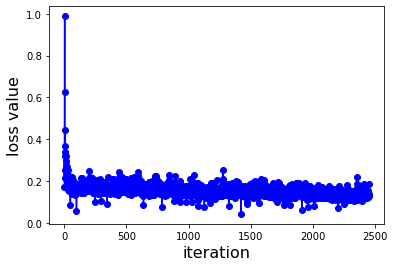

In [13]:
model.train(train, val, test)

In [14]:
model.save_model('./model_MPNN_CNN_DTC_RANDOM')